# 1. IMPORT AND EXPLORE THE DATA

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
!pip install stats

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stats

**READING THE DATA CSV FILE**

In [ ]:
data=pd.read_csv('/content/signal-data.csv') #original dataframe

**COPYING THE DATA**

In [ ]:
data_copy=data.copy() # a deepcopy of the original dataframe

**EXPLORING SHAPE OF THE DATA  AND FEATURES IN THE DATA**

In [ ]:
print(' shape of the data is :',data_copy.shape)

 shape of the data is : (1567, 592)


1567 rows and 592 columns

In [ ]:
data_copy.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

*we have total of 592 columns  and 1567 rows*

**FINDING DATATYPES**

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
data_copy.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

Findings :

1. the feature **'Time'** is  **object datatype**

2. the independent feature **'Pass/Fail'** is an  **int64 datatype**

3. all other features ranging from **0 to 589** comes under **float64 datatype**

**TOTAL NULLVALUES IN DATA**

In [ ]:
print('Total null values in data are : ',data_copy.isna().sum().sum())

Total null values in data are :  41951


**SUMMARY STATISTICS OF THE DATA**

In [ ]:
summary_statistics = data_copy.describe()
summary_statistics


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# 2.DATA CLEANSING

In [ ]:
# Remove the 'Time' and dependent ('Pass/Fail') attributes since they are not neceessary for the analysis and training the model
df= data_copy.drop(columns=[data_copy.columns[0], data_copy.columns[-1]])

In [ ]:
df.shape

(1567, 590)

In [ ]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns


,0
0,6
1,7
2,14
3,14
4,14
5,14
6,14
7,9
8,2
9,2


In [ ]:
missing_percentage = (missing_columns / df.shape[0]) * 100
print(missing_percentage)


0      0.382897
1      0.446713
2      0.893427
3      0.893427
4      0.893427
         ...   
585    0.063816
586    0.063816
587    0.063816
588    0.063816
589    0.063816
Length: 538, dtype: float64


In [ ]:
columns_to_drop=missing_percentage[missing_percentage >50].index
columns_to_drop #28 columns have grater than 50% missing values

Index(['72', '73', '85', '109', '110', '111', '157', '158', '220', '244',
       '245', '246', '292', '293', '345', '346', '358', '382', '383', '384',
       '492', '516', '517', '518', '578', '579', '580', '581'],
      dtype='object')

In [ ]:
len(columns_to_drop)

28

In [ ]:
df_dropped=df.drop(columns=columns_to_drop) #dropping those 28 columns
df_dropped.shape #now we have 562 columns after dropping 28 columns.

(1567, 562)

In [ ]:
df_dropped.isna().sum().sum()

11683

In [ ]:
df_imputed = df_dropped.fillna(df_dropped.mean()) #imputed the null values by mean of the particular column.


In [ ]:
df_imputed.shape

(1567, 562)

In [ ]:
df_imputed.isna().sum().sum() #checking again if there are any missing values after imputing

0

In [ ]:
duplicates = df_imputed.duplicated().sum()  #checking if there are any duplicate rows(records)
print(f'Total duplicate rows: {duplicates}')


Total duplicate rows: 0


In [ ]:
df_imputed

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100


In [ ]:
# Identify columns with only one unique value
constant_columns = [col for col in df_imputed.columns if df_imputed[col].nunique() == 1]

# Print the constant columns
print("Constant columns to be removed:", constant_columns)

# Remove the constant columns
df_reduced = df_imputed.drop(columns=constant_columns)
print('After removing ',len(constant_columns),'constant columns , shape of the df_imputed is :')
# Check the shape after removing constant columns
print(df_reduced.shape)


Constant columns to be removed: ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']
After removing  116 constant columns , shape of the df_imputed is :
(1567, 446)


In [ ]:
# randomly rechecking some columns from the  deleted columns  whether they having only one unique value or not .
df_imputed[['179', '186', '189', '190', '191', '192', '193']].nunique()

,0
179,1
186,1
189,1
190,1
191,1
192,1
193,1


In [ ]:
skewness = df_reduced.skew()
print(skewness)


0       0.514641
1      -0.043163
2      -0.307136
3       1.719310
4      19.733442
         ...    
585    24.705005
586     1.438483
587     1.948028
588     2.030018
589     2.715340
Length: 446, dtype: float64


CAPPING OUTLIERS

In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Cap outliers in all features
for feature in df_reduced.columns:
    df_reduced = cap_outliers(df_reduced, feature)



CHECKING SKEWNESS AFTER CAPPING OUTLIERS AND APPLYING LOG TRANSFORMATION

In [ ]:
import numpy as np

# Recalculate skewness
skewness = df_reduced.skew()
print("Skewness after capping outliers:", skewness)

# Identify highly skewed features (absolute skewness > 1)
highly_skewed_features = skewness[abs(skewness) > 1].index
print("Highly skewed features after capping outliers:", highly_skewed_features)

# Apply log transformation to highly skewed features
for feature in highly_skewed_features:
    df_reduced[feature] = np.log1p(df_reduced[feature])  # log1p to handle zero values

# Verify skewness after log transformation
skewness_transformed = df_reduced[highly_skewed_features].skew()
print("Skewness after log transformation:", skewness_transformed)


Skewness after capping outliers: 0      0.261023
1     -0.120664
2     -0.025039
3      0.846705
4      0.667572
         ...   
585    0.751248
586    0.274822
587    0.841874
588    0.855475
589    0.970815
Length: 446, dtype: float64
Highly skewed features after capping outliers: Index(['25', '26', '27', '87', '116', '140', '155', '159', '161', '162', '177',
       '198', '204', '212', '222', '275', '287', '294', '296', '297', '334',
       '360', '428', '430', '432', '433', '468', '470', '476', '485', '487',
       '494', '560'],
      dtype='object')
Skewness after log transformation: 25    -1.359445
26    -1.477470
27    -2.473398
87    -1.118648
116   -1.109472
140    0.774848
155    0.899563
159   -0.874123
161   -0.758779
162   -0.525082
177    0.805418
198    0.730371
204    0.884980
212    0.966319
222    1.198760
275    0.988190
287    0.938834
294   -0.694679
296   -0.661085
297   -0.437183
334    0.901933
360    1.235341
428    0.573719
430   -0.125385
432   -1.324673
433

In [ ]:
df_reduced

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.12650,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,1.6765,14.9509,0.500500,0.01180,0.0035,2.363000,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.66060,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,1.1065,10.9003,0.501900,0.02230,0.0055,4.444700,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.01720,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,2.0952,9.2721,0.495800,0.01570,0.0039,3.174500,0.048825,0.034850,0.011050,82.860200
3,2988.72,2479.90,2199.0333,909.79260,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,1.7585,8.5831,0.499000,0.01030,0.0025,2.054400,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.52000,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,1.6597,10.9698,0.491225,0.02385,0.0056,4.777625,0.020200,0.014900,0.004400,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,2349.59605,1.4843,88.0495,0.1248,1.342400,-0.004500,-0.005700,...,1.4879,11.7256,0.498800,0.01430,0.0039,2.866900,0.006800,0.013800,0.004700,203.172000
1563,3052.31,2522.55,2198.5667,1124.65950,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,1.0187,17.8379,0.497500,0.01310,0.0036,2.623800,0.006800,0.013800,0.004700,203.172000
1564,2978.81,2379.78,2206.3000,1110.49670,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,1.2237,17.7267,0.498700,0.01530,0.0041,3.059000,0.019700,0.008600,0.002500,43.523100
1565,2894.92,2532.01,2177.0333,1183.72870,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,1.7085,19.2104,0.500400,0.01780,0.0038,3.566200,0.026200,0.024500,0.007500,93.494100


In [ ]:



# Calculate variance for all features
variances = df_reduced.var()

# Sort variances in ascending order
variances_sorted = variances.sort_values()

# Display variances sorted in ascending order
print(variances_sorted)
variancelist=variances_sorted.to_list()



# Remove features HAVING VARIANCE LESS THAN 0.01
less_variance_features = variances_sorted[variances_sorted < 0.01].index
df_reduced = df_reduced.drop(columns=less_variance_features)
print ('removed ',len(less_variance_features),'features')
print(f"Shape of dataframe after removing zero variance features: {df_reduced.shape}")


342    0.000000e+00
209    0.000000e+00
74     0.000000e+00
206    0.000000e+00
249    0.000000e+00
           ...     
3      1.433812e+05
225    1.586475e+05
21     2.271593e+05
23     1.035488e+06
24     5.944765e+06
Length: 446, dtype: float64
removed  172 features
Shape of dataframe after removing zero variance features: (1567, 274)


**WE TRANSFORMED THE DATA BY**
1. REMOVING 28 COLUMNS HAVING GREATER THAN 50% NULLVALUES ,
2. IMPUTING MEAN
3. REMOVING  116 CONSTANT COLUMNS
4. CAPPING OUTLIERS
5. LOG TRANSFORMATION
6. REMOVED THE DATETIME COLUMN(FIRST) AND DEPENDENT COLUMN(LAST)
7. REMOVED 172 COLUMNS WITH VARIANCE LESSER THAN 0.01

IN TOTAL WE HAVE REMOVED 318 FEATURES FROM 592 FEATURES

# 3. DATA ANALYSIS AND VISUALIZATION

STATISTICAL ANALYSIS

In [ ]:
# # Summary statistics
# summary_statistics = df_reduced.describe()
# summary_statistics

In [ ]:
# import matplotlib.pyplot as plt

# # Histograms for each feature
# df_reduced.hist(bins=30, figsize=(20, 15))
# plt.suptitle('Histogram of All Features After Transformations')
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Histograms for each feature
# df_reduced.hist(bins=30, figsize=(20, 15))
# plt.suptitle('Histogram of All Features After Transformations')
# plt.show()

# # Box plots for each feature
# df_reduced.plot(kind='box', subplots=True, layout=(20, 22), figsize=(20, 15), sharex=False, sharey=False)
# plt.suptitle('Box Plot of All Features After Transformations')
# plt.show()


In [ ]:
# # Define the number of rows and columns for the subplot grid
# num_features = 20
# num_rows = 5
# num_cols = 4

# # Create a figure with subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
# fig.suptitle('Distribution Plots of the First 20 Features', fontsize=16)

# # Loop through each feature and plot the distplot in the corresponding subplot
# for i, column in enumerate(df_reduced.columns[:num_features]):
#     row = i // num_cols
#     col = i % num_cols
#     sns.histplot(df_reduced[column], bins=30, kde=True, ax=axes[row, col])
#     axes[row, col].set_title(f'Feature {column}')

# # Adjust the layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()




**BIVARIATE ANALYSIS :**

In [ ]:


# # Correlation matrix
# corr_matrix = df_reduced.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix After Transformations')
# plt.show()


In [ ]:
# # Scatter plots for each feature against the target variable
# for column in df_reduced.columns:
#     plt.figure()
#     sns.scatterplot(x=df_reduced[column], y=data_copy['Pass/Fail'])
#     plt.title(f'Scatter Plot of {column} vs Pass/Fail After Transformations')
#     plt.show()


In [ ]:


# # Number of features to plot
# num_features = 20

# # Create a figure with subplots
# num_rows = 5
# num_cols = 4
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
# fig.suptitle('Box Plots of Features Against Pass/Fail', fontsize=16)

# # Loop through each feature and plot the box plot in the corresponding subplot
# for i, column in enumerate(df_reduced.columns[:num_features]):
#     row = i // num_cols
#     col = i % num_cols
#     sns.boxplot(x=data_copy['Pass/Fail'], y=df_reduced[column], ax=axes[row, col])
#     axes[row, col].set_title(f'Feature {column}')

# # Adjust the layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


**MULTIVARIATE ANALYSIS**


In [ ]:


# # Pair plots for a subset of features
# sns.pairplot(df_reduced.iloc[:, :10])  # Adjust the number of features as needed
# plt.suptitle('Pair Plot of Features')
# plt.show()


AS WE CAN SEE THERE IS NO CORRELATION BETWEEN THE FEATURES

In [ ]:
# # Correlation matrix
# corr_matrix = df_reduced.corr()

# # Plot heatmap of the correlation matrix
# plt.figure(figsize=(20, 15))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title('Heatmap of Feature Correlations')
# plt.show()


# 4. DATA-PREPROCESSING

In [ ]:
df_reduced.isna().sum().sum()

0

In [ ]:
df_reduced.shape

(1567, 274)

In [ ]:
df_reduced.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
# Segregate predictors and target attributes
X = df_reduced
y = data_copy['Pass/Fail']


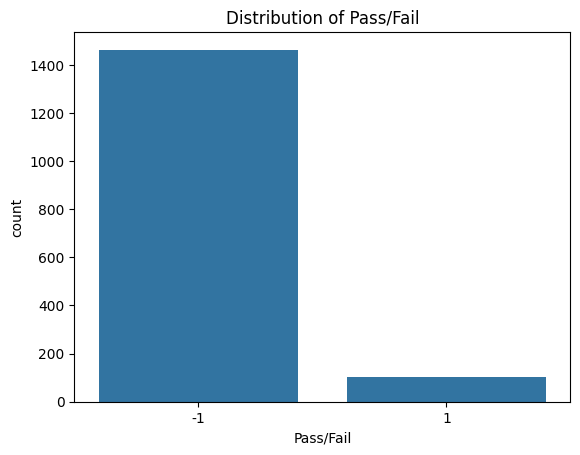

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [ ]:
# Check the distribution of the target variable
sns.countplot(x=y)
plt.title('Distribution of Pass/Fail')
plt.show()

# Print the counts of each class
print(y.value_counts())


NOT BALANCED

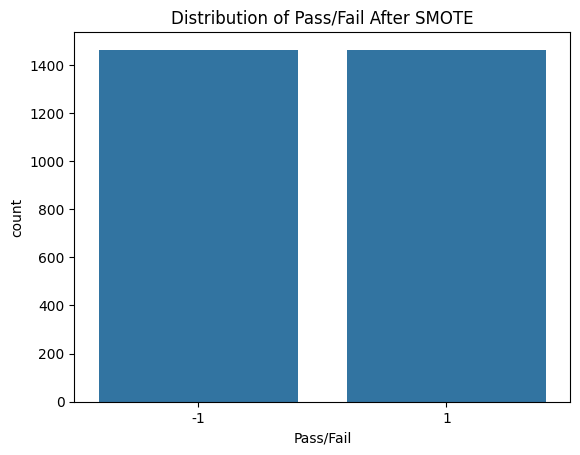

Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the distribution after SMOTE
sns.countplot(x=y_balanced)
plt.title('Distribution of Pass/Fail After SMOTE')
plt.show()

# Print the counts of each class after SMOTE
print(y_balanced.value_counts())


In [ ]:
X_balanced.shape , y_balanced.shape

((2926, 274), (2926,))

NOW BALANCED

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Verify scaling
print(f"Mean of X_balanced_scaled: {X_balanced_scaled.mean(axis=0)}")
print(f"Std of X_balanced_scaled: {X_balanced_scaled.std(axis=0)}")


Mean of X_balanced_scaled: [-1.02963131e-15 -2.74285038e-15 -1.40602954e-14 -5.54883852e-16
 -2.52551075e-16  7.72223479e-16  1.51894901e-15 -7.77080230e-17
 -1.81642504e-15 -5.53669664e-16  9.98669515e-15  1.94270058e-15
 -6.89658705e-16  5.58526416e-17 -9.71350288e-18  5.97380427e-16
 -4.46821133e-16 -1.55416046e-16 -1.50559295e-15  5.13358627e-15
  1.94270058e-17  3.59982417e-14  3.82323473e-14  3.23216808e-14
  7.38226219e-15 -8.82471737e-15 -9.00077461e-15 -1.45702543e-15
 -3.20545595e-16 -1.29918101e-15  1.44731193e-15 -1.57844422e-16
  3.64742033e-15  5.34242658e-17  1.67557925e-15  3.08403716e-15
  4.85675144e-18  5.12387277e-16 -1.35989040e-16 -2.02040860e-15
  3.45223963e-15 -3.64256358e-16 -3.49686104e-16  2.33124069e-16
  1.35989040e-16 -1.18796140e-14  2.67121329e-17 -7.20256239e-15
  7.86308058e-15 -3.01118589e-16  1.15105009e-15  4.44149919e-15
  9.71350288e-16  2.51943981e-17  0.00000000e+00  6.55661444e-16
 -4.00196319e-15  1.19973902e-14  2.23410566e-16 -1.55853154e-1

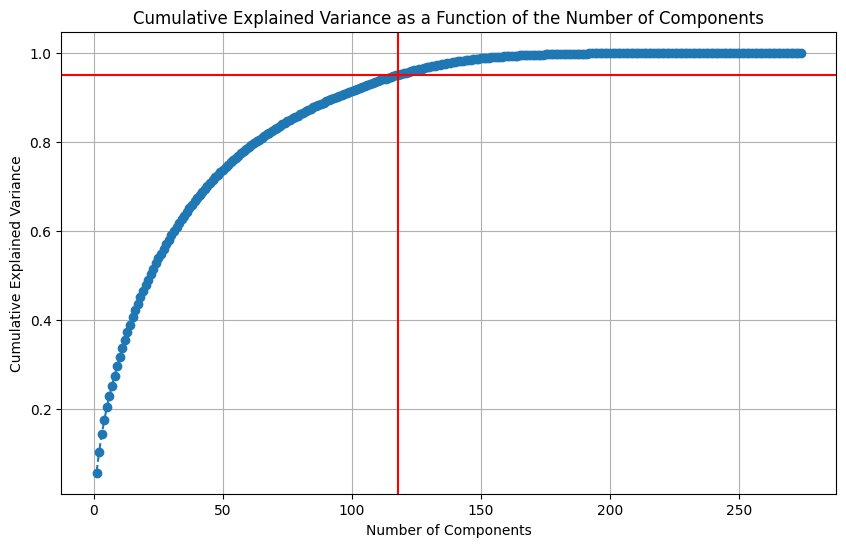

Number of components needed to capture 95% variance: 118


In [ ]:

from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA().fit(X_balanced_scaled)

# Calculate explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_explained_variance >= 0.95) + 1, color='r', linestyle='-')
plt.grid()
plt.show()

# Print the number of components needed to capture 95% variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components needed to capture 95% variance: {n_components_95}")


In [ ]:

# Apply PCA to reduce the number of features
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_balanced_scaled)

# Print the shape of the reduced data
print(f"Shape of data after PCA: {X_pca.shape}")


Shape of data after PCA: (2926, 118)


In [126]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_balanced, test_size=0.4, random_state=42)

print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train_pca: (1755, 118)
Shape of X_test_pca: (1171, 118)
Shape of y_train: (1755,)
Shape of y_test: (1171,)


In [127]:


# Function to print summary statistics
def print_summary_statistics(data, label):
    print(f"Summary statistics for {label}:")
    print(f"Mean: {np.mean(data, axis=0)}")
    print(f"Std: {np.std(data, axis=0)}")
    print(f"Min: {np.min(data, axis=0)}")
    print(f"Max: {np.max(data, axis=0)}")
    print("\n")

# Check statistical characteristics
print_summary_statistics(X_train_pca, "X_train_pca")
print_summary_statistics(X_test_pca, "X_test_pca")
print_summary_statistics(X_pca, "X_pca (original data)")


Summary statistics for X_train_pca:
Mean: [-0.01025156  0.07993667  0.0221392   0.05929386  0.02216233 -0.01852508
  0.01495866 -0.03399004  0.03598488  0.01964766 -0.00184447 -0.02420199
  0.02447583  0.00846631  0.00377108 -0.03973954  0.02002695 -0.02491653
 -0.01222469 -0.02513153 -0.01468756 -0.06226972 -0.02369441 -0.01713519
  0.02358968  0.00489501  0.0201579   0.04115856 -0.02401053  0.00200809
 -0.01499629 -0.03597835 -0.01257462  0.0117822  -0.01006123  0.01135601
  0.01314599 -0.02014827  0.00652705  0.03043303 -0.00129915  0.03626271
  0.03073308 -0.00248307 -0.02498835 -0.00189943  0.01677342 -0.00941906
 -0.01941761 -0.00461478 -0.00333729  0.03041697 -0.01267104 -0.00500338
 -0.03525406 -0.03291975 -0.01322735 -0.00472153 -0.00438127  0.00940598
  0.03002981  0.02359543 -0.01115712 -0.00726678 -0.03570615 -0.00297963
 -0.00793822  0.00305882  0.01380829 -0.00352197 -0.01198131 -0.00476368
 -0.01370335 -0.00843184 -0.00589805  0.00533079 -0.0131567   0.01259557
 -0.01701

# 5.

COMPARING MODELS WITH DIFFERENT HYPERPARAMETERS USING GRIDSEARCHCV

**XGBoost expects binary classification targets to be either 0 or 1.**

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Define parameter grids
param_grids = {
    'Logistic Regression': {'C': [1, 5, 10, 20]},
    'Support Vector Machine': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]},
    'Random Forest Classifier': {'n_estimators': [10, 20, 50, 100]},
    'MLPClassifier': {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 'alpha': [0.0001, 0.001, 0.01]}
}

# Initialize model objects
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=1000)
}

# Dictionary to store the best models
best_models = {}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Store the best models
best_models


Running GridSearchCV for Logistic Regression
Best parameters for Logistic Regression: {'C': 1}
Running GridSearchCV for Support Vector Machine
Best parameters for Support Vector Machine: {'C': 5, 'kernel': 'rbf'}
Running GridSearchCV for Random Forest Classifier
Best parameters for Random Forest Classifier: {'n_estimators': 100}
Running GridSearchCV for MLPClassifier
Best parameters for MLPClassifier: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}


{'Logistic Regression': LogisticRegression(C=1, max_iter=1000),
 'Support Vector Machine': SVC(C=5),
 'Random Forest Classifier': RandomForestClassifier(),
 'MLPClassifier': MLPClassifier(alpha=0.001, max_iter=1000)}

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List to store the results
results_list = []

# Evaluate each best model
for model_name, model in best_models.items():
    model.fit(X_train_pca, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1
    })

# Convert the results list to a DataFrame
models_performance_df = pd.DataFrame(results_list)



In [112]:
models_performance_df

,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Logistic Regression,0.887607,0.858362,0.866331,0.858362,0.858108
1,Support Vector Machine,1.000000,0.998294,0.998300,0.998294,0.998294
2,Random Forest Classifier,1.000000,0.994881,0.994930,0.994881,0.994879
3,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
4,MLPClassifier,1.000000,0.967577,0.969637,0.967577,0.967589


**Not implementing  the KNN model due to time complexity , poor performance and inefficiency with large datasets.**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# # from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.neural_network import MLPClassifier

# # Initialize model objects
# models_list = [
#     LogisticRegression(max_iter=1000),
#     SVC(),
#     # KNeighborsClassifier(),
#     RandomForestClassifier(),
#     XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     MLPClassifier(max_iter=1000, random_state=42)
# ]

# model_hyperparameters = {
#     'Logistic Regression': {'C': [1, 5, 10, 20]},
#     'Support Vector Machine': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]},
#     # 'K Nearest Neighbours': {'n_neighbors': [3, 5, 10]},
#     'Random Forest Classifier': {'n_estimators': [10, 20, 50, 100]},
#     'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
#     'MLPClassifier': {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 'alpha': [0.0001, 0.001, 0.01]}
# }

# model_keys = list(model_hyperparameters.keys())

# def ModelSelection(models_list, hyperparameters_dictionary):
#     result = []
#     for i, model in enumerate(models_list):
#         key = model_keys[i]
#         params = hyperparameters_dictionary[key]
#         print(f"Evaluating {model.__class__.__name__} with parameters {params}")
#         classifier = GridSearchCV(model, params, cv=5, n_jobs=-1)
#         # Fitting data to classifier with converted target variable
#         classifier.fit(X_train_pca, y_train_converted)
#         result.append({
#             'Model Used': model.__class__.__name__,
#             'Highest_score': classifier.best_score_,
#             'Best_hyperparameters': classifier.best_params_
#         })
#     result_dataframe = pd.DataFrame(result, columns=['Model Used', 'Highest_score', 'Best_hyperparameters'])
#     return result_dataframe

# # Run the model selection
# results = ModelSelection(models_list, model_hyperparameters)
# results




In [ ]:
results

NameError: name 'results' is not defined

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier

# # Initialize the models with the best hyperparameters
# models_with_best_params = {
#     'Logistic Regression': LogisticRegression(C=10),
#     'Support Vector Machine': SVC(C=5, kernel='rbf'),
#     'Random Forest Classifier': RandomForestClassifier(n_estimators=50),
#     'XGBoost': XGBClassifier(learning_rate=0.1, n_estimators=150, use_label_encoder=False, eval_metric='logloss'),
#     'MLPClassifier': MLPClassifier(alpha=0.0001, hidden_layer_sizes=(100, 50), max_iter=1000)
# }

# # List to store the results
# models_performance = []

# # Evaluate each model
# for model_name, model in models_with_best_params.items():
#     model.fit(X_train_pca, y_train_converted)
#     y_pred = model.predict(X_test_pca)

#     accuracy = accuracy_score(y_test_converted, y_pred)
#     precision = precision_score(y_test_converted, y_pred, average='weighted')
#     recall = recall_score(y_test_converted, y_pred, average='weighted')
#     f1 = f1_score(y_test_converted, y_pred, average='weighted')

#     # Append the results to the list
#     models_performance.append({
#         'Model': model_name,
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1 Score': f1
#     })

# # Convert the results list to a DataFrame
# performance_results = pd.DataFrame(models_performance)

# performance_results


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier

# # Initialize the models with the best hyperparameters
# models_with_best_params = {
#     'Logistic Regression': LogisticRegression(C=10),
#     'Support Vector Machine': SVC(C=5, kernel='rbf'),
#     'Random Forest Classifier': RandomForestClassifier(n_estimators=50),
#     'XGBoost': XGBClassifier(learning_rate=0.1, n_estimators=150, use_label_encoder=False, eval_metric='logloss'),
#     'MLPClassifier': MLPClassifier(alpha=0.0001, hidden_layer_sizes=(100, 50), max_iter=1000)
# }

# # List to store the results
# results_list = []

# # Evaluate each model
# for model_name, model in models_with_best_params.items():
#     model.fit(X_train_pca, y_train_converted)

#     # Predictions
#     y_train_pred = model.predict(X_train_pca)
#     y_test_pred = model.predict(X_test_pca)

#     # Train metrics
#     train_accuracy = accuracy_score(y_train_converted, y_train_pred)

#     # Test metrics
#     test_accuracy = accuracy_score(y_test_converted, y_test_pred)
#     test_precision = precision_score(y_test_converted, y_test_pred, average='weighted')
#     test_recall = recall_score(y_test_converted, y_test_pred, average='weighted')
#     test_f1 = f1_score(y_test_converted, y_test_pred, average='weighted')

#     # Append the results to the list
#     results_list.append({
#         'Model': model_name,
#         'Train Accuracy': train_accuracy,
#         'Test Accuracy': test_accuracy,
#         'Test Precision': test_precision,
#         'Test Recall': test_recall,
#         'Test F1 Score': test_f1
#     })

# # Convert the results list to a DataFrame
# results_dff = pd.DataFrame(results_list)

# results_dff

In [ ]:
# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform cross-validation
# cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
# print(f'Cross-validation scores: {cv_scores}')
# print(f'Mean cross-validation score: {np.mean(cv_scores)}')


In [ ]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [10,20,50,100],
#     # 'max_depth': [None, 10],
#     # 'min_samples_split': [2],
#     # 'min_samples_leaf': [1],
#     # 'bootstrap': [True, False]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best cross-validation score: {grid_search.best_score_}')


In [ ]:
# # Get the best model
# best_rf = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_rf.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')


In [ ]:
# from sklearn.metrics import classification_report
# # Make predictions on the test set
# y_pred = best_rf.predict(X_test)
# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**NAIVE BAYES**

In [ ]:
# # Initialize the Gaussian Naive Bayes model
# nb = GaussianNB()

# # Train the model
# nb.fit(X_train, y_train)


In [ ]:
# # Make predictions on the test set
# y_pred = nb.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**SVM**

In [ ]:
# from sklearn.svm import LinearSVC

# # Initialize the Support Vector Classifier
# svm = LinearSVC(random_state=42)

# # Train the model
# svm.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred = svm.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**LOGISTIC REGRESSION**

In [ ]:
# from sklearn.linear_model import LogisticRegression
# # Initialize the Logistic Regression model
# log_reg = LogisticRegression(random_state=42, max_iter=1000)

# # Train the model
# log_reg.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred = log_reg.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


**KNN**

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# # Initialize the K-Nearest Neighbors model
# knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# # Train the model
# knn.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred = knn.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test set accuracy: {accuracy}')

# # Generate the classification report
# report = classification_report(y_test, y_pred)
# print(report)


# # Define the parameter grid
# param_grid = {'n_neighbors': list(range(1, 21))}  # Test values from 1 to 20

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print(f'Best parameters found: {grid_search.best_params_}')
# print(f'Best cross-validation score: {grid_search.best_score_}')
